Source: https://langchain-ai.github.io/langgraph/

1. Install libaries

In [ ]:
%%capture --no-stderr
%pip install langchain langgraph langchain_openai

2. Initialize the model and tools.

In [ ]:
import os
from google.colab import userdata

os.environ["OPENAI_API_KEY"] = userdata.get("open_ai_key")

from langchain_openai import OpenAI

model = OpenAI()

3. Initialize graph with state.

In [ ]:
from langgraph.graph import START, END, MessagesState, StateGraph
from typing import TypedDict

def call_model_agent(state: MessagesState):
  messages = state["messages"]
  response = model.invoke(messages)
  return {"messages": [response]}

workflow = StateGraph(MessagesState)

4. Define graph nodes.

In [ ]:
workflow.add_node("call_model_agent", call_model_agent)

5. Define entry point and graph edges.

In [ ]:
workflow.add_edge(START, "call_model_agent")
workflow.add_edge("call_model_agent", END)

6. Compile the graph.

In [ ]:
graph =workflow.compile()

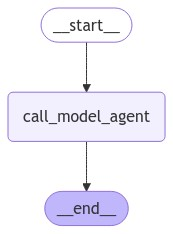

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

7. Execute the graph.

In [ ]:
from langchain_core.messages import HumanMessage
print(graph.invoke({"messages":[HumanMessage(content="I am feeling nurvous due to presenatation ongoing. How I can do better")]}))

{'messages': [HumanMessage(content='I am feeling nurvous due to presenatation ongoing. How I can do better', additional_kwargs={}, response_metadata={}, id='60011bae-f14c-4e31-b2fd-c1e96079dbaf'), HumanMessage(content='\n\nHere are a few tips that may help you do better during your presentation:\n\n1. Practice beforehand: The more you practice your presentation, the more confident you will feel during the actual presentation. This will also help you become more familiar with your material and reduce nervousness.\n\n2. Take deep breaths: Before you start your presentation, take a few deep breaths to help calm your nerves. This will also help you slow down your speaking and sound more confident.\n\n3. Use positive self-talk: Instead of focusing on your nerves, try to focus on positive thoughts. Tell yourself that you are well-prepared and capable of delivering a great presentation.\n\n4. Visualize success: Take a moment to imagine yourself giving a successful presentation. Visualize your